In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.13.0


Define a plot function

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("Disk Usages", fontsize=15)
    plt.grid(True)

In [4]:
df = pd.read_csv("43.csv")
df.to_csv("43.csv")
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333


Dataset information

row[0]=time_step;
row[4]=Cpu_usages;
row[7]=RAM_usage;
row[8]=Disk_read;
row[9]=Disk_write;
row[11]=Bandwidth;

In [5]:
Sum_disk=(df["Disk read throughput [KB/s]"] + df["Disk write throughput [KB/s]"])
df["Disk I/O"]=Sum_disk
df["Disk I/O"]=((df["Disk I/O"]-df["Disk I/O"].min())/(df["Disk I/O"].max()-df["Disk I/O"].min()))*20
df.to_csv("43.csv")
df

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],Disk I/O
0,1376314846,2,5851.998636,3.901332,0.066667,2097152.0,106254.133333,7.933333,1.066667,0.000000,0.000000,0.022571
1,1376315146,2,5851.998636,0.000000,0.000000,2097152.0,79689.600000,0.000000,1.000000,0.000000,0.000000,0.002508
2,1376315446,2,5851.998636,9.753331,0.166667,2097152.0,62912.000000,0.000000,0.066667,0.000000,0.000000,0.000167
3,1376315746,2,5851.998636,0.000000,0.000000,2097152.0,97865.333333,0.000000,0.066667,0.000000,0.000000,0.000167
4,1376316046,2,5851.998636,0.000000,0.000000,2097152.0,127225.333333,1.933333,0.333333,0.000000,0.000000,0.005684
...,...,...,...,...,...,...,...,...,...,...,...,...
8627,1378905598,2,5851.998944,76.075986,1.300000,2097152.0,329950.133333,0.333333,561.866667,581.800000,18.400000,1.409906
8628,1378905898,2,5851.998944,54.618657,0.933333,2097152.0,244665.333333,1.800000,1.133333,2.466667,1.066667,0.007356
8629,1378906198,2,5851.998944,58.519989,1.000000,2097152.0,139808.800000,0.200000,0.866667,2.400000,1.066667,0.002675
8630,1378906498,2,5851.998944,325.761275,5.566667,2097152.0,325755.733333,1029.666667,55.466667,2.466667,1.533333,2.721338


In [6]:
import csv
time_step = []
BW_usage = []

with open('43.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    BW_usage.append(float(row[12]))
    time_step.append(int(row[0]))

In [7]:
print(time_step[:10])
print(BW_usage[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.022570532915360503, 0.0025078369905956114, 0.0001671891327063739, 0.0001671891327063739, 0.005684430512016718, 0.0, 0.0011703239289446187, 0.001671891327063741, 0.0010031347962382445, 0.0]


# Visualize Bandwidth usage data against time

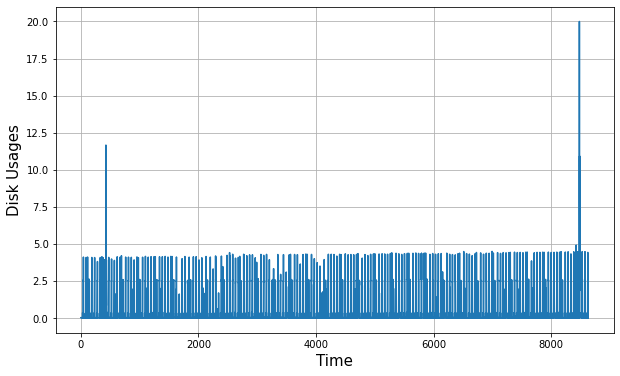

In [8]:
series = np.array(BW_usage)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
#plt.title("Bandwidth Usages dataset",fontsize=16)

plot_series(time, series)

# Split dataset into train and test set

In [9]:
split_time = 7500
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

Plot test data

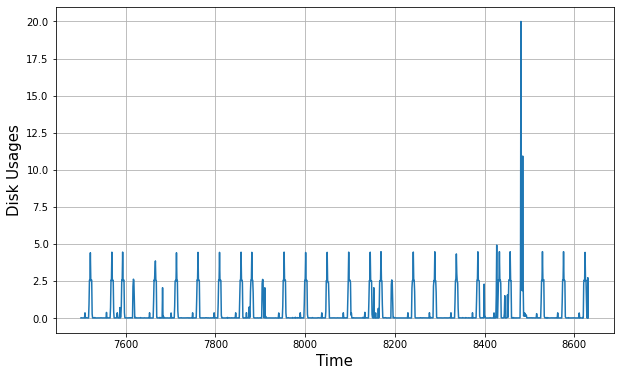

In [10]:
plt.figure(figsize=(10, 6))
#plt.title("Test Data",fontsize=16)
plot_series(time_valid, x_valid)

# window function definition

In [11]:
#window function defination
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [12]:
np.random.seed(51)
window_size = 64
batch_size = 125
shuffle_buffer_size = 1000
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>


neural network model definition

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.GRU(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100)
])

In [14]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
60/60 [==============================] - 27s 279ms/step - loss: 1.8684 - mae: 2.2059 - lr: 1.0000e-08
Epoch 2/100
60/60 [==============================] - 13s 205ms/step - loss: 1.7897 - mae: 2.1161 - lr: 1.1220e-08
Epoch 3/100
60/60 [==============================] - 13s 211ms/step - loss: 1.7115 - mae: 2.0405 - lr: 1.2589e-08
Epoch 4/100
60/60 [==============================] - 13s 215ms/step - loss: 1.6358 - mae: 1.9735 - lr: 1.4125e-08
Epoch 5/100
60/60 [==============================] - 13s 207ms/step - loss: 1.5627 - mae: 1.9141 - lr: 1.5849e-08
Epoch 6/100
60/60 [==============================] - 13s 211ms/step - loss: 1.4922 - mae: 1.8572 - lr: 1.7783e-08
Epoch 7/100
60/60 [==============================] - 13s 212ms/step - loss: 1.4234 - mae: 1.8012 - lr: 1.9953e-08
Epoch 8/100
60/60 [==============================] - 13s 215ms/step - loss: 1.3557 - mae: 1.7450 - lr: 2.2387e-08
Epoch 9/100
60/60 [==============================] - 13s 214ms/step - loss: 1.2892 - mae

Finding Minimum loss

In [15]:
min_loss=min(history.history["loss"])
min_loss_index=history.history["loss"].index(min_loss)
min_lr=(history.history["lr"])[min_loss_index]
min_lr

0.00017782794

Plotting minimum loss point

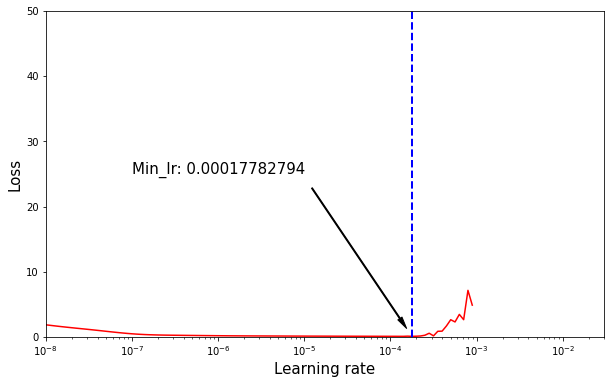

In [16]:
plt.figure(figsize=(10, 6))
plt.semilogx(history.history["lr"], history.history["loss"],'r')
plt.axis([1e-8, 3e-2, 0, 50])
plt.xlabel("Learning rate", fontsize=15)
plt.ylabel("Loss", fontsize=15)
#plt.grid()
s='Min_lr: '+str(min_lr)
plt.axvline(x=min_lr, linewidth=2,color="b",ls="--")
plt.annotate(s, xy=(min_lr, min_loss), xytext=(1E-7, 25),arrowprops=dict(facecolor='black', shrink=0.05 ,width=1.0, headwidth=5.0),fontsize=15)
#plt.savefig('lr_vs_loss.png', dpi = 720) 
plt.show()